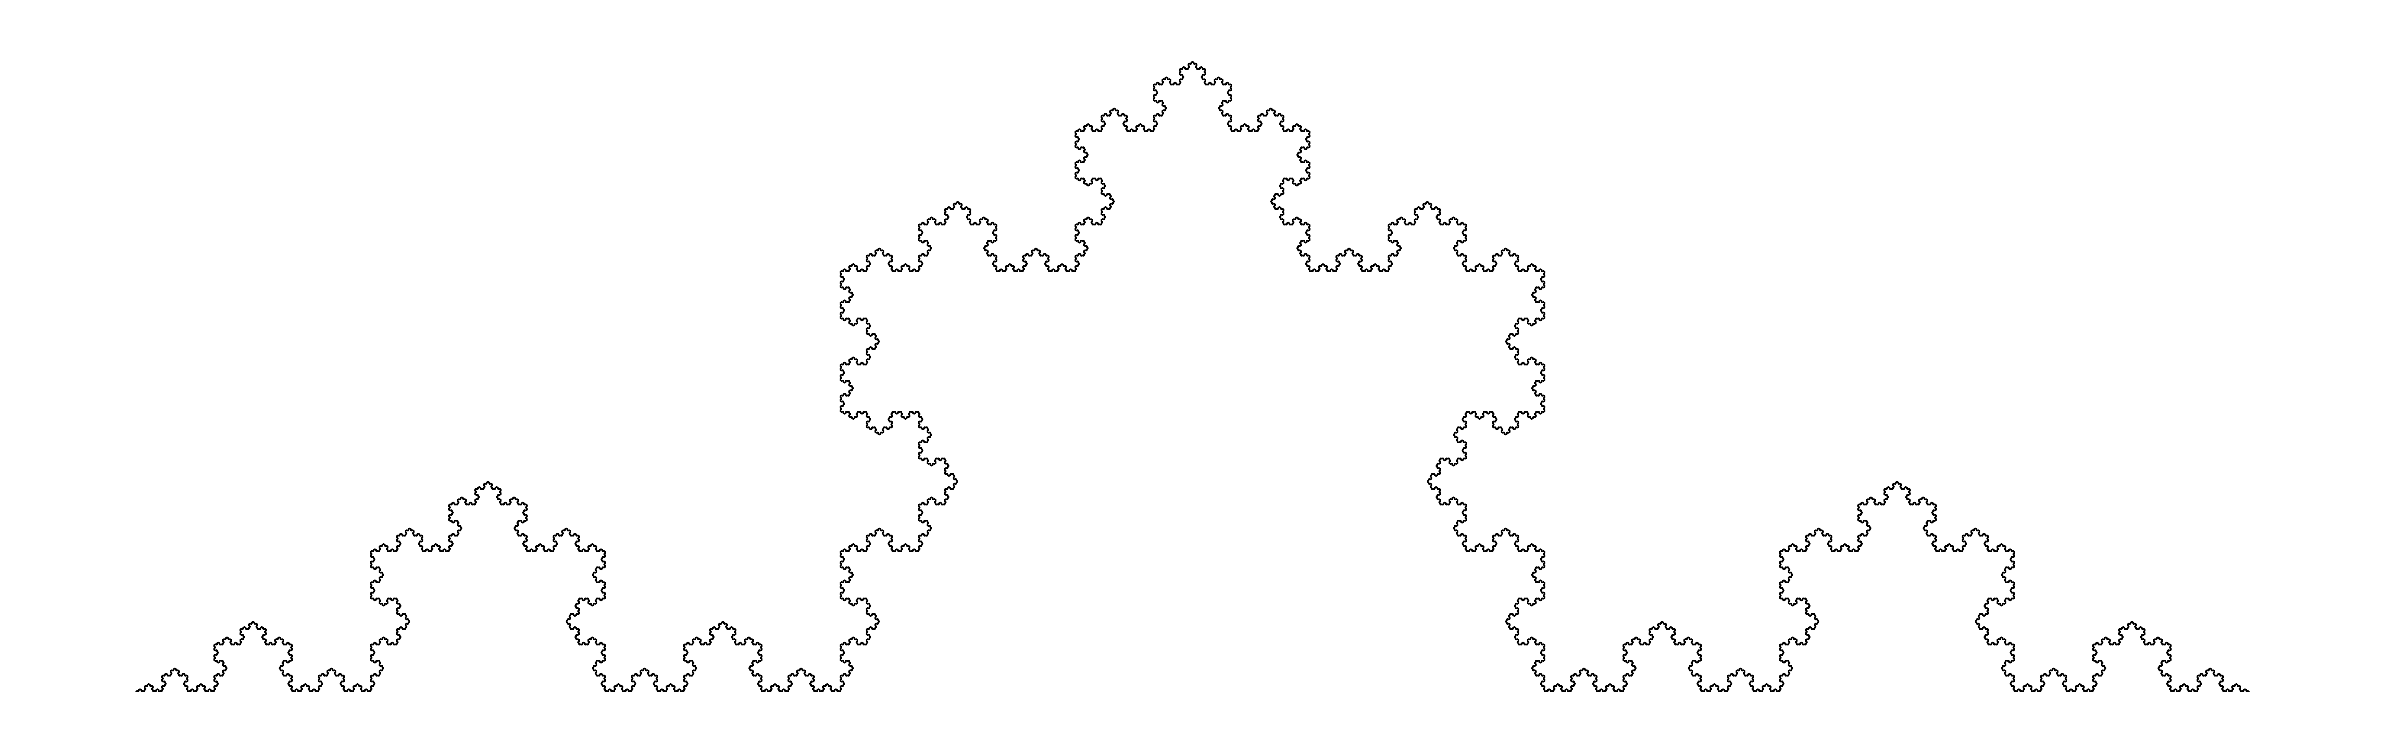

In [11]:
# siehe https://stackoverflow.com/questions/932222/implementing-the-koch-curve#932498

import math
import matplotlib.pyplot as plt

# Anzahl der Iterationen 
STEPS = 10

angles = [math.radians(60*x) for x in range(6)]
sines = [math.sin(x) for x in angles]
cosin = [math.cos(x) for x in angles]

def L(angle, coords, jump):
    return (angle + 1) % 6
def R(angle, coords, jump):
    return (angle + 4) % 6
def F(angle, coords, jump):
    coords.append(
        (coords[-1][0] + jump * cosin[angle],
         coords[-1][1] + jump * sines[angle]))
    return angle

decode = dict(L=L, R=R, F=F)

# Iteratives Wachstum der Kurve
def grow(steps, length=200, startPos=(0,0)):
    pathcodes="F"
    for i in range(steps):
        pathcodes = pathcodes.replace("F", "FLFRFLF")

    jump = float(length) / (3 ** steps)
    coords = [startPos]
    angle = 0

    for move in pathcodes:
        angle = decode[move](angle, coords, jump)

    return coords

# Ploteinstellungen
plt.style.use("default")
plt.style.use("seaborn-dark")
plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(10,3),dpi=300) #figsize=(7,7)
fig.patch.set_facecolor('white')
fig.canvas.set_window_title('Skyhook')
plt.xticks([])
plt.yticks([])

# generierte Kochkurve
koch = grow(STEPS)

# sortiere Daten
x = []; y = []
for i in range(len(koch)):
    x.append(koch[i][0])
    y.append(koch[i][1])

# Zeige die Kurve
plt.plot(x,y, lw=2/STEPS)